<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [6]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('penguins')

df = df.dropna()

print("Número de especies distintas:", df['species'].nunique())
print("\nLista de especies:", df['species'].unique())

print("\nCaracterísticas promedio por especie:\n")
print(
    df.groupby("species")[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
      .mean()
      .round(2)
)


Número de especies distintas: 3

Lista de especies: ['Adelie' 'Chinstrap' 'Gentoo']

Características promedio por especie:

           bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species                                                                 
Adelie              38.82          18.35             190.10      3706.16
Chinstrap           48.83          18.42             195.82      3733.09
Gentoo              47.57          15.00             217.24      5092.44


### 2. ¿Hay valores faltantes en las variables?  
Determine una estrategia de limpieza y aplíquela.


In [7]:
df_raw = sns.load_dataset('penguins')
print("Valores nulos antes de la limpieza:\n")
print(df_raw.isnull().sum())

df = df_raw.dropna()
print("\nForma original:", df_raw.shape)
print("Forma después de limpieza:", df.shape)


Valores nulos antes de la limpieza:

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Forma original: (344, 7)
Forma después de limpieza: (333, 7)


### 3. ¿Cuál es la isla con mayor número de pingüinos en el dataset limpio?  
¿Hay un desbalance en el número de pingüinos por isla?


In [8]:
island_counts = df['island'].value_counts()
print("Recuento de pingüinos por isla:\n")
print(island_counts)

print("\nProporción sobre el total:\n")
print((island_counts / island_counts.sum()).round(3))


Recuento de pingüinos por isla:

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

Proporción sobre el total:

island
Biscoe       0.489
Dream        0.369
Torgersen    0.141
Name: count, dtype: float64


### 4. Número de pingüinos por isla y especie


In [9]:
pd.crosstab(df['island'], df['species'])


species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


### 5. ¿Cuál es la longitud media y la desviación estándar del tamaño del pico de los pingüinos por especie?


In [10]:
df.groupby("species")["bill_length_mm"].agg(["mean","std"]).round(2)


,mean,std
species,,
Adelie,38.82,2.66
Chinstrap,48.83,3.34
Gentoo,47.57,3.11


### 6. ¿Qué pingüino tiene el pico más largo en el dataset limpio y cuál es su especie?


In [12]:
row_max = df.loc[df["bill_length_mm"].idxmax()]

print("Pingüino con el pico más largo:")
print("Especie:", row_max["species"])
print("Isla:", row_max["island"])
print("Sexo:", row_max["sex"])
print("Longitud pico (mm):", row_max["bill_length_mm"])
print("Profundidad pico (mm):", row_max["bill_depth_mm"])
print("Longitud aleta (mm):", row_max["flipper_length_mm"])
print("Masa corporal (g):", row_max["body_mass_g"])


Pingüino con el pico más largo:
Especie: Gentoo
Isla: Biscoe
Sexo: Male
Longitud pico (mm): 59.6
Profundidad pico (mm): 17.0
Longitud aleta (mm): 230.0
Masa corporal (g): 6050.0


### 7. ¿Cómo es la distribución de la masa corporal entre las especies de pingüinos?


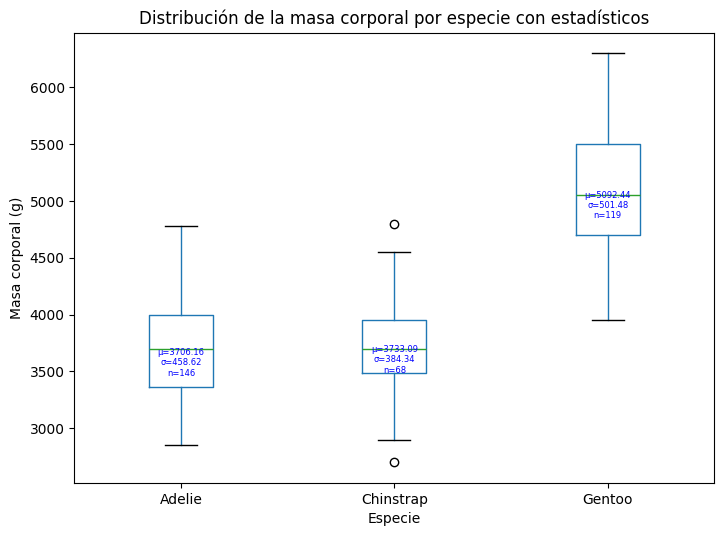

,mean,std,count
species,,,
Adelie,3706.16,458.62,146
Chinstrap,3733.09,384.34,68
Gentoo,5092.44,501.48,119


In [21]:
import matplotlib.pyplot as plt

stats = df.groupby("species")["body_mass_g"].agg(["mean","std","count"]).round(2)

fig, ax = plt.subplots(figsize=(8,6))
df.boxplot(column="body_mass_g", by="species", grid=False, ax=ax)

for i, species in enumerate(stats.index, start=1):
    mean_val = stats.loc[species, "mean"]
    std_val = stats.loc[species, "std"]
    n_val = stats.loc[species, "count"]
    ax.text(i, mean_val, f"μ={mean_val}\nσ={std_val}\nn={n_val}",
            ha="center", va="top", fontsize=6, color="blue")

plt.title("Distribución de la masa corporal por especie con estadísticos")
plt.suptitle("")
plt.xlabel("Especie")
plt.ylabel("Masa corporal (g)")
plt.show()

stats


### 8. Describa la distribución de la masa corporal con ayuda de la media y desviación estándar por especie


In [25]:
stats = df.groupby("species")["body_mass_g"].agg(["mean","std","count"]).round(2)

for species, row in stats.iterrows():
    mean = row["mean"]
    std = row["std"]
    n = row["count"]
    print(f"Especie: {species}")
    print(f" - Media: {mean} g")
    print(f" - Desviación estándar: {std} g")
    print(f" - Número de observaciones: {n}")
    print(f" → Interpretación: La mayoría de los {species} tienen una masa corporal cercana a {mean} g, "
          f"con una variación típica de ±{std} g.\n")

stats


Especie: Adelie
 - Media: 3706.16 g
 - Desviación estándar: 458.62 g
 - Número de observaciones: 146.0
 → Interpretación: La mayoría de los Adelie tienen una masa corporal cercana a 3706.16 g, con una variación típica de ±458.62 g.

Especie: Chinstrap
 - Media: 3733.09 g
 - Desviación estándar: 384.34 g
 - Número de observaciones: 68.0
 → Interpretación: La mayoría de los Chinstrap tienen una masa corporal cercana a 3733.09 g, con una variación típica de ±384.34 g.

Especie: Gentoo
 - Media: 5092.44 g
 - Desviación estándar: 501.48 g
 - Número de observaciones: 119.0
 → Interpretación: La mayoría de los Gentoo tienen una masa corporal cercana a 5092.44 g, con una variación típica de ±501.48 g.



,mean,std,count
species,,,
Adelie,3706.16,458.62,146
Chinstrap,3733.09,384.34,68
Gentoo,5092.44,501.48,119


### 9. ¿Cuál es la diferencia en masa corporal promedio y desviación estándar entre machos y hembras?


In [26]:
stats_sex = df.groupby("sex")["body_mass_g"].agg(["mean","std","count"]).round(2)

mean_diff = stats_sex.loc["Male","mean"] - stats_sex.loc["Female","mean"]
std_diff = stats_sex.loc["Male","std"] - stats_sex.loc["Female","std"]

print("Resultados por sexo:\n")
print(stats_sex, "\n")

print("Diferencia en medias (Male - Female):", round(mean_diff,2), "g")
print("Diferencia en desviaciones estándar (Male - Female):", round(std_diff,2), "g")

print("\nInterpretación:")
print(f"Los machos tienen en promedio {round(mean_diff,2)} g más de masa corporal que las hembras.")
print(f"La variabilidad en machos es {round(std_diff,2)} g {'mayor' if std_diff>0 else 'menor'} que en hembras.")


Resultados por sexo:

           mean     std  count
sex                           
Female  3862.27  666.17    165
Male    4545.68  787.63    168 

Diferencia en medias (Male - Female): 683.41 g
Diferencia en desviaciones estándar (Male - Female): 121.46 g

Interpretación:
Los machos tienen en promedio 683.41 g más de masa corporal que las hembras.
La variabilidad en machos es 121.46 g mayor que en hembras.


### 10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?


In [27]:
stats_flipper = df.groupby("species")["flipper_length_mm"].agg(["mean","std","count"]).round(2)

print("Resultados de longitud de aleta por especie:\n")
print(stats_flipper, "\n")

for species, row in stats_flipper.iterrows():
    print(f"Especie: {species}")
    print(f" - Media: {row['mean']} mm")
    print(f" - Desviación estándar: {row['std']} mm")
    print(f" - Observaciones: {row['count']}")
    print(f" → Los {species} tienen en promedio una longitud de aleta de {row['mean']} mm, "
          f"con una variación típica de ±{row['std']} mm.\n")


Resultados de longitud de aleta por especie:

             mean   std  count
species                       
Adelie     190.10  6.52    146
Chinstrap  195.82  7.13     68
Gentoo     217.24  6.59    119 

Especie: Adelie
 - Media: 190.1 mm
 - Desviación estándar: 6.52 mm
 - Observaciones: 146.0
 → Los Adelie tienen en promedio una longitud de aleta de 190.1 mm, con una variación típica de ±6.52 mm.

Especie: Chinstrap
 - Media: 195.82 mm
 - Desviación estándar: 7.13 mm
 - Observaciones: 68.0
 → Los Chinstrap tienen en promedio una longitud de aleta de 195.82 mm, con una variación típica de ±7.13 mm.

Especie: Gentoo
 - Media: 217.24 mm
 - Desviación estándar: 6.59 mm
 - Observaciones: 119.0
 → Los Gentoo tienen en promedio una longitud de aleta de 217.24 mm, con una variación típica de ±6.59 mm.



### 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?


In [28]:
flipper_minmax = df.groupby("species")["flipper_length_mm"].agg(["min","max"]).round(2)

print("Resultados de longitud mínima y máxima de aleta por especie:\n")
print(flipper_minmax, "\n")

print("Valores globales:")
print(" - Longitud mínima global:", df["flipper_length_mm"].min(), "mm")
print(" - Longitud máxima global:", df["flipper_length_mm"].max(), "mm")


Resultados de longitud mínima y máxima de aleta por especie:

             min    max
species                
Adelie     172.0  210.0
Chinstrap  178.0  212.0
Gentoo     203.0  231.0 

Valores globales:
 - Longitud mínima global: 172.0 mm
 - Longitud máxima global: 231.0 mm


### 12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?


Media de longitud de pico por especie e isla:

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe      38.98        NaN   47.57
Dream       38.52      48.83     NaN
Torgersen   39.04        NaN     NaN 



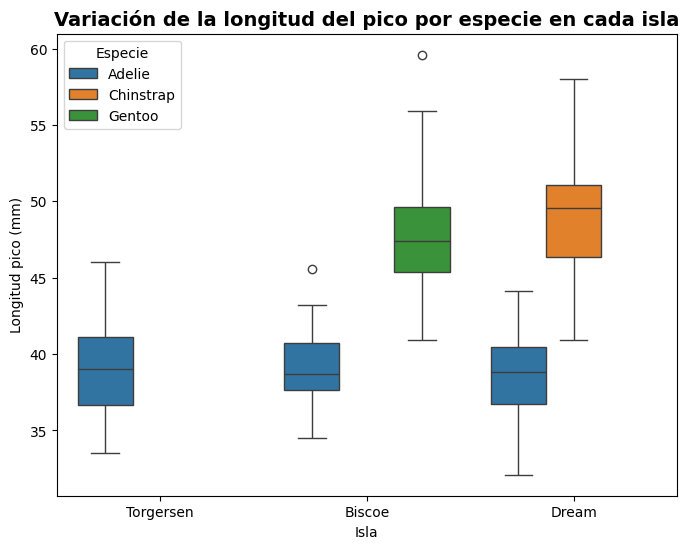

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_bill = df.pivot_table(
    index="island",
    columns="species",
    values="bill_length_mm",
    aggfunc="mean"
).round(2)

print("Media de longitud de pico por especie e isla:\n")
print(pivot_bill, "\n")

plt.figure(figsize=(8,6))
sns.boxplot(x="island", y="bill_length_mm", hue="species", data=df)
plt.title("Variación de la longitud del pico por especie en cada isla", fontsize=14, weight="bold")
plt.xlabel("Isla")
plt.ylabel("Longitud pico (mm)")
plt.legend(title="Especie")
plt.show()


### 13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


In [30]:
stats_island = df.groupby("island")["bill_length_mm"].agg(["std","mean","count"]).round(2)

print("Desviación estándar de la longitud del pico por isla:\n")
print(stats_island, "\n")

isla_max_var = stats_island["std"].idxmax()
valor_max = stats_island.loc[isla_max_var,"std"]

print(f"La isla con mayor variación en la longitud del pico es {isla_max_var} (σ = {valor_max} mm).")


Desviación estándar de la longitud del pico por isla:

            std   mean  count
island                       
Biscoe     4.83  45.25    163
Dream      5.95  44.22    123
Torgersen  3.03  39.04     47 

La isla con mayor variación en la longitud del pico es Dream (σ = 5.95 mm).


### 14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?  
¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.


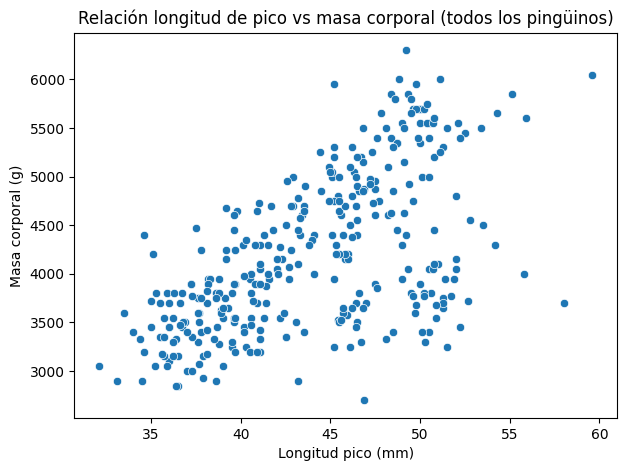

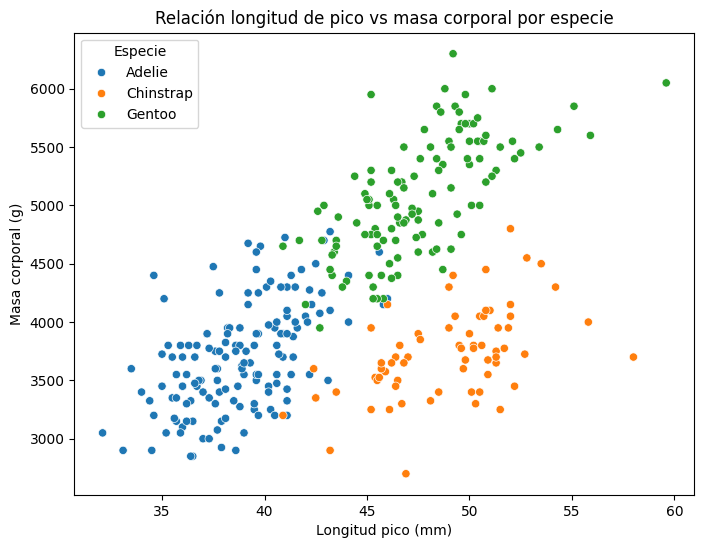

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(x="bill_length_mm", y="body_mass_g", data=df)
plt.title("Relación longitud de pico vs masa corporal (todos los pingüinos)")
plt.xlabel("Longitud pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x="bill_length_mm", y="body_mass_g", hue="species", data=df)
plt.title("Relación longitud de pico vs masa corporal por especie")
plt.xlabel("Longitud pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.legend(title="Especie")
plt.show()


### 15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?


In [32]:
from scipy.stats import pearsonr

results = []
for species in df["species"].unique():
    subset = df[df["species"] == species][["bill_length_mm","body_mass_g"]].dropna()
    r, p = pearsonr(subset["bill_length_mm"], subset["body_mass_g"])
    results.append([species, round(r,3), round(p,5), len(subset)])

import pandas as pd
res_df = pd.DataFrame(results, columns=["Especie","Coef_Pearson","p_value","N"])
print(res_df)

for _, row in res_df.iterrows():
    conclusion = "Significativa" if row["p_value"] < 0.05 else "No significativa"
    print(f"{row['Especie']}: r = {row['Coef_Pearson']} (p = {row['p_value']}) → {conclusion}")


     Especie  Coef_Pearson  p_value    N
0     Adelie         0.544  0.00000  146
1  Chinstrap         0.514  0.00001   68
2     Gentoo         0.667  0.00000  119
Adelie: r = 0.544 (p = 0.0) → Significativa
Chinstrap: r = 0.514 (p = 1e-05) → Significativa
Gentoo: r = 0.667 (p = 0.0) → Significativa


### 16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?


Estadísticos de longitud de aleta por especie y sexo:

                    mean   std  count
species   sex                        
Adelie    Female  187.79  5.60     73
          Male    192.41  6.60     73
Chinstrap Female  191.74  5.75     34
          Male    199.91  5.98     34
Gentoo    Female  212.71  3.90     58
          Male    221.54  5.67     61 



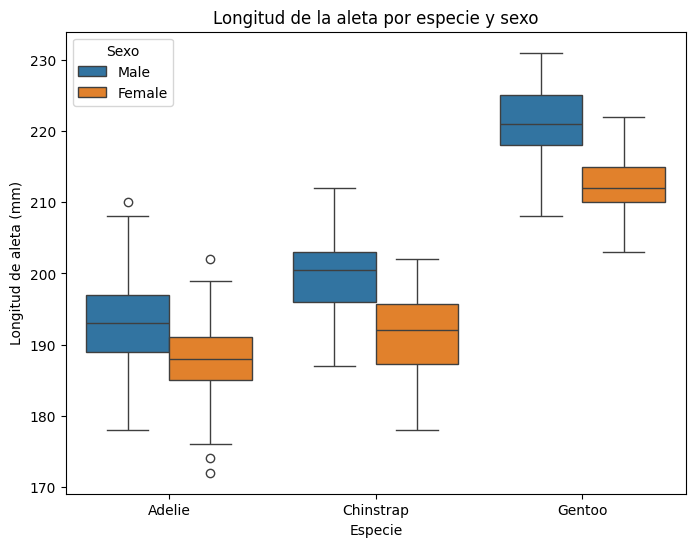

In [33]:
stats_flipper_sex = df.groupby(["species","sex"])["flipper_length_mm"].agg(["mean","std","count"]).round(2)
print("Estadísticos de longitud de aleta por especie y sexo:\n")
print(stats_flipper_sex, "\n")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x="species", y="flipper_length_mm", hue="sex", data=df)
plt.title("Longitud de la aleta por especie y sexo")
plt.xlabel("Especie")
plt.ylabel("Longitud de aleta (mm)")
plt.legend(title="Sexo")
plt.show()


### 17. Test de hipótesis  
¿La correlación entre longitud del pico y masa corporal puede explicarse por aleatoriedad?


In [34]:
from scipy.stats import pearsonr, t

species_test = "Gentoo"
subset = df[df["species"] == species_test][["bill_length_mm","body_mass_g"]].dropna()

r, _ = pearsonr(subset["bill_length_mm"], subset["body_mass_g"])
n = len(subset)

t_stat = r * ((n-2) / (1-r**2))**0.5
p_val = 2 * (1 - t.cdf(abs(t_stat), df=n-2))

print(f"Especie: {species_test}")
print(f"Coeficiente r = {round(r,3)} con n = {n}")
print(f"t = {round(t_stat,3)}, p = {round(p_val,6)}")

if p_val < 0.05:
    print("Conclusión: Rechazamos H0 → la correlación es significativa.")
else:
    print("Conclusión: No rechazamos H0 → no hay evidencia de correlación real.")


Especie: Gentoo
Coeficiente r = 0.667 con n = 119
t = 9.676, p = 0.0
Conclusión: Rechazamos H0 → la correlación es significativa.
